# Sampling Methods
In this seminar we will practice some of the concepts discussed in L04

## Collision detection

Collision detection is the computational problem of detecting an intersection of two or more objects in virtual space. Collision detection is a classic problem of computational geometry with applications in computer graphics, physical simulation, robotics and etc.

There are multiple ways to represent objects: Polygons, Polyhedral, Algebraic models, 3D triangles, meshes, NURBS, bitmaps,  SDFs, etc.

For each of the object representations, there is an exact collision checker, however it might be tremendously complex and calculating the full Cobswould be impractical. This is just a brief introduction to the topic.

<img src="https://i.sstatic.net/HGFVf.png" alt="Alternative text" />
<img src="https://i.sstatic.net/tEd5E.png" alt="Alternative text" />


Regardless of the method, we can follow a 2-phase strategy:
* Broad Phase: to avoid expensive calculations, we broadly describe objects **as boxes or spheres**.
* Narrow Phase: details are checked. For some configurations (close to obstacles) this can be the only way.

<img src="https://happycoding.io/tutorials/processing/images/collision-detection-6.png" alt="Alternative text" />

**Remark**: this seminar will describe examples of checking collision in continous space

Our first task is to play around with visualisation here, below is provided some code for this.


## Imagine that we have point and obstacle in front of it

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def render(point,obstacle):
    plt.plot(point[0],point[1], marker='o',color=[1,0,0])
    plt.gca().add_patch(plt.Circle((obstacle[0], obstacle[1]), obstacle[2], fill=True))
    plt.axis('equal')
    plt.show()

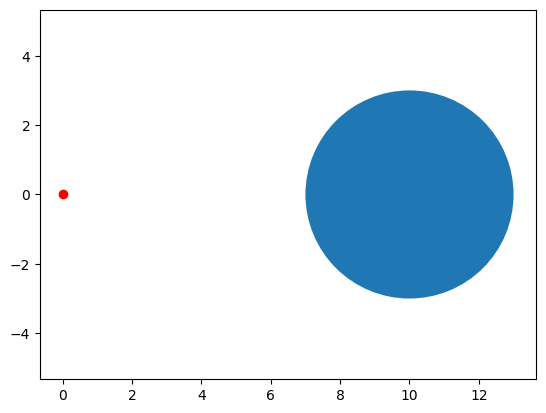

In [2]:
point = np.array([0,0]) # x,y
obstacle = [10,0,3] #  x,y,radius (assume that is circle)

render(point,obstacle)

# Task 1: check collision point with circle
* subtask A - realise check collision
* subtask B - think how to avoid collision with that knowledge

In [3]:
def check_collision(point,obstacle):
    x_0, y_0, r = obstacle
    center = np.array([x_0,y_0])
    if np.linalg.norm(point - center) <= r:
        return True
    return False

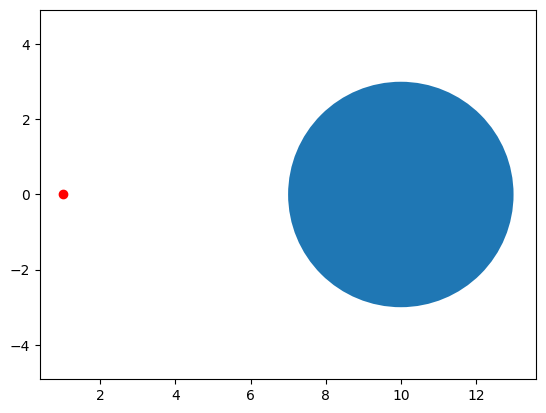

collision detected:  False


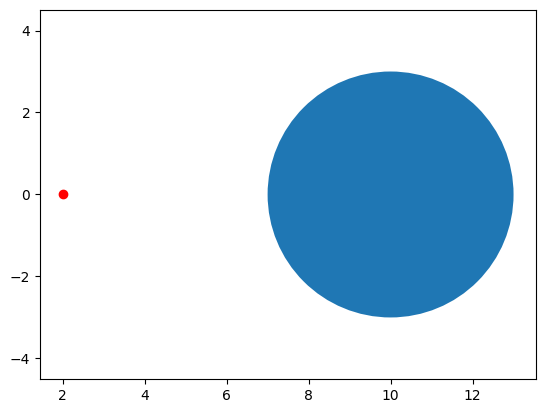

collision detected:  False


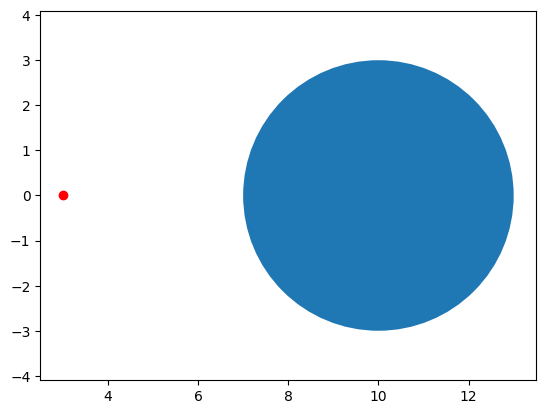

collision detected:  False


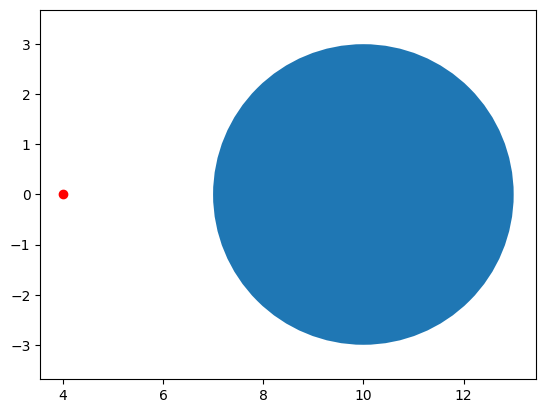

collision detected:  False


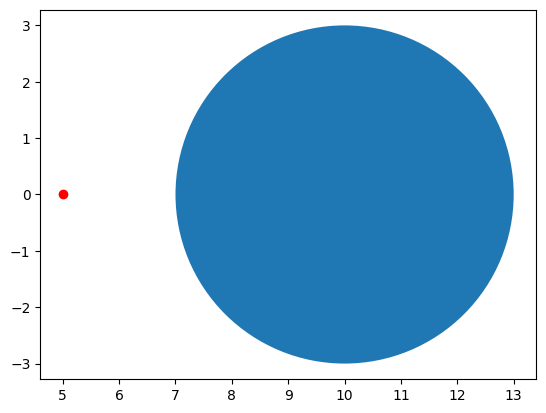

collision detected:  False


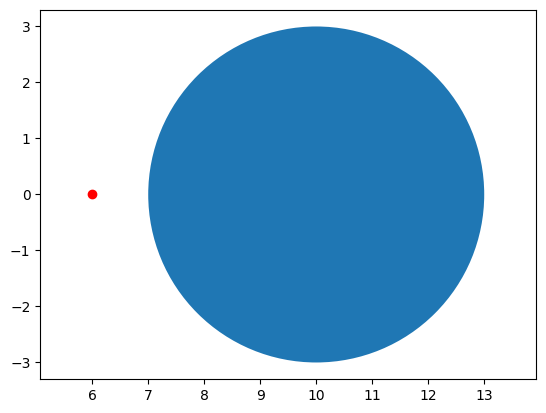

collision detected:  False


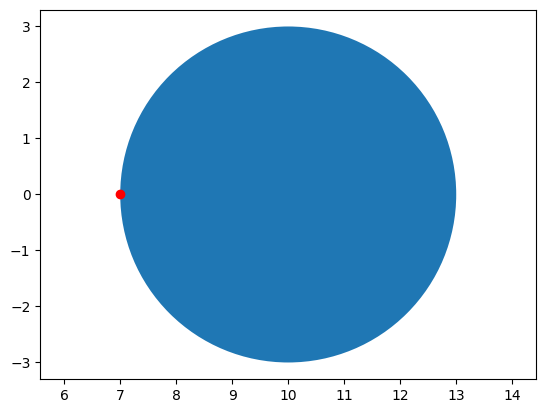

collision detected:  True


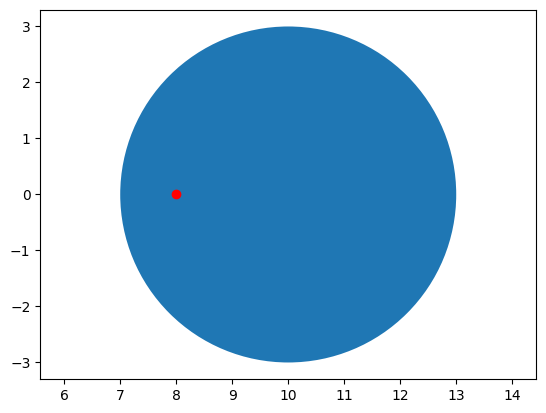

collision detected:  True


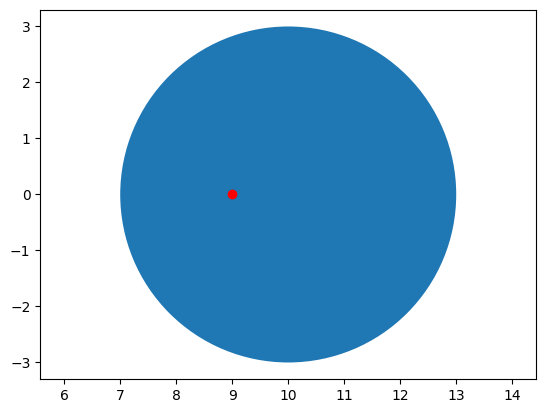

collision detected:  True


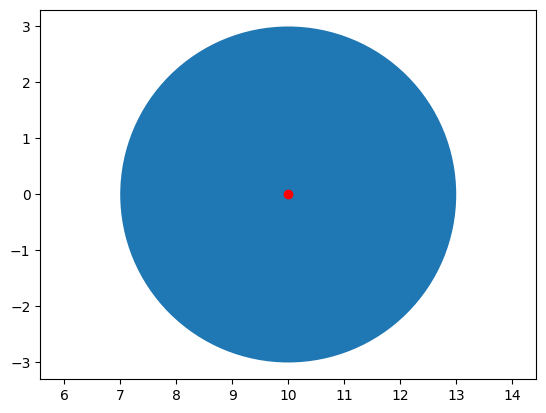

collision detected:  True


In [4]:
point = np.array([0,0]) # x,y
obstacle = [10,0,3] #  x,y,radius (assume that is circle)
velocity = np.array([1,0]) # vx,vy
for _ in range(10):
    # TODO B: think how to avoid collision
    point = point+velocity # discrete step
    collision = check_collision(point,obstacle)
    render(point,obstacle)
    print("collision detected: ", collision)

# Task 2: check collision 2R manipulator with circle
* subtask A - realise check collision for 
* subtask B - think how to avoid collision with that knowledge

<img src="https://www.researchgate.net/profile/Nilanjan-Chakraborty-7/publication/224090716/figure/fig2/AS:669088540008473@1536534547577/A-planar-manipulator-with-2-revolute-joints-2R-manipulator.png" alt="Alternative text" />

<img src="https://cdn-images-1.readmedium.com/v2/resize:fit:800/1*emAmhmVX6UkJFnR6Byqjpg.png" alt="Alternative text" />

<img src="https://raw.githubusercontent.com/mbernste/mbernste.github.io/master/images/matrix_vec_mult_as_lin_comb.png" alt="Alternative text" />

In [5]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

def SE2(q):
    """
        Given a pose q = [t_x, t_y, theta] and a point p = [x,y], it transforms 
        according to p' = R(theta)p + t. This is a rigid body transformation in 2D
    """
    
    t_x, t_y, theta = q
    T = np.array([
        [np.cos(theta), -np.sin(theta), t_x],
        [np.sin(theta),  np.cos(theta), t_y],
        [0, 0, 1]])
    return T

def plot_segment(s, color_):
    """
    Plots a segment in current figures
    """
    plt.plot(s[:,0], s[:,1] , linewidth=2, color=color_)
    plt.plot(s[1,0], s[1,1], marker='o', color=color_)
    plt.plot(s[0,0], s[0,1], marker='o', color=color_)

def move_2R(q):
    # return positions of points
    joints = np.zeros((3,2))
    a1, a2 = q
    T1 = SE2(np.array([0,0,a1])) # this is the first joint, a simple rotation
    T2 = SE2(np.array([1,0,a2])) # the second joint, it is a bar of d =1, plus a rotation for the second joint
    T3 = SE2(np.array([1,0,0]))  # this is simply to express the lenght of the second bar, no rotation required
    p = T1 @ T2 @ np.array([0,0,1])
    joints[1,:] = p[:2]
    p = T1 @ T2 @ T3 @ np.array([0,0,1])
    joints[2,:] = p[:2]
    return joints

def render_2R(joints, obstacle=None, color = [0.8,0.1,0.1]):
    """Plots the 2R manipulator, a kinematic chain of 2 bars of length 1"""
    plot_segment(joints[[0,1],:],color)
    plot_segment(joints[[1,2],:],color)
    # plot obstacle
    if obstacle is not None:
        plt.gca().add_patch(plt.Circle((obstacle[0], obstacle[1]), obstacle[2], fill=True))
    plt.axis('equal')
    return 


positions of joints: 
 [[0.         0.        ]
 [0.30901699 0.95105652]
 [0.61803399 1.90211303]]


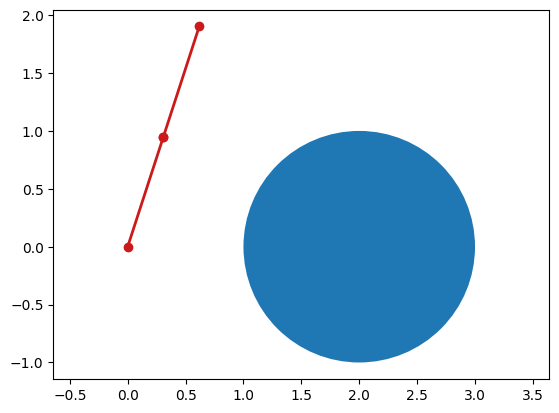

In [7]:
angles = np.array([np.pi/2.5,0]) # [angle1,angle2] in radians
joints = move_2R(angles)
obstacle = [2,0,1] # [x,y,radius]
render_2R(joints,obstacle)
print("positions of joints: \n",joints)

In [41]:
def check_collision_2R(joints, obstacle):
    #TODO : return True if manipulator in collision, else False
    # A check joints collision

    for joint in joints:
        if np.linalg.norm(joint - obstacle[:2]) <= obstacle[2]:
            return True
    return False
def point_to_segment_distance(point, segment_start, segment_end):

    v = segment_end - segment_start
    w = point - segment_start

    proj_scalar = np.dot(w, v) / np.dot(v, v)
    proj_scalar = np.clip(proj_scalar, 0, 1) 
    
    proj_point = segment_start + proj_scalar * v
    
    return np.linalg.norm(point - proj_point)


def check_collision_2R_segment(joints, obstacle):
    #TODO : return True if manipulator in collision, else False
    # C(optional) check links collision (line between joints)
    obstacle_center = np.array(obstacle[:2])
    obstacle_radius = obstacle[2]
    
    for i in range(len(joints) - 1):
        # Check the distance from the obstacle to the current segment
        distance = point_to_segment_distance(obstacle_center, joints[i], joints[i + 1])
        # print(distance)
        if distance <= obstacle_radius:
            return True
    return False

step  0  collision detected:  False
step  1  collision detected:  False
step  2  collision detected:  False
step  3  collision detected:  False
step  4  collision detected:  True
step  5  collision detected:  True
step  6  collision detected:  True
step  7  collision detected:  True
step  8  collision detected:  True
step  9  collision detected:  True


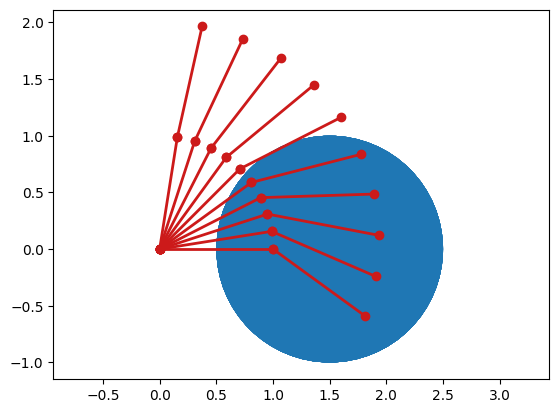

In [39]:
angles = np.array([np.pi/2,0]) # [angle1,angle2] in radians
obstacle = [1.5,0,1] # [x,y,radius]
velocity = np.array([-np.pi/20,-np.pi/50]) # [Vel_angle1,Vel_angle2] in radians
for step in range(10):
    # TODO B: think how to avoid collision
    angles = angles+velocity 
    joints = move_2R(angles)
    collision = check_collision_2R(joints,obstacle)
    collision = collision or check_collision_2R_segment(joints,obstacle)
    render_2R(joints,obstacle)
    print("step ",step," collision detected: ", collision)

True
False


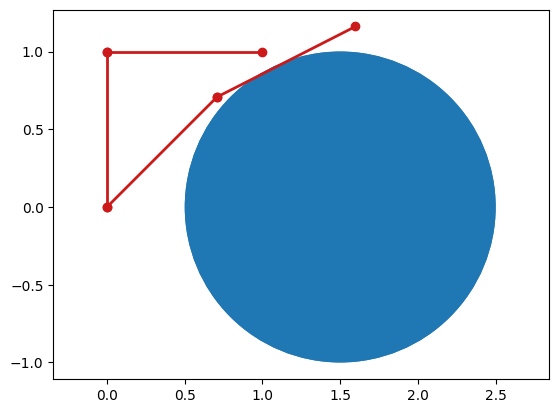

In [45]:
angles = np.array([ 0.78539816, -0.31415927]) 
joints = move_2R(angles) 
obstacle = [1.5,0,1] 
render_2R(joints,obstacle) 
print(check_collision_2R_segment(joints,obstacle)) 
 
angles = np.array([ np.pi/2, -np.pi/2]) 
joints = move_2R(angles) 
obstacle = [1.5,0,1] 
render_2R(joints,obstacle) 
print(check_collision_2R_segment(joints,obstacle))

### Task 3: Difference with discrete space
* A - What would be the size of state space for 2R manipulator with 1-degree descritization?
* B - What would be the size of state space for 4R manipulator with 1-degree descritization?
* C - Can you explain the differences between discrete space and continuous space?

In [ ]:
# TODO A: 2R manipulator with 1-degree
size_of_state_space_2R = 0 # TODO: calculate state space
# TODO B: 4R manipulator with 1-degree
size_of_state_space_4R = 0 # TODO: calculate state space
print("size of state space 2R ",size_of_state_space_2R)
print("size of state space 4R ",size_of_state_space_4R)

### Task 4: Distances in manipulator scheme
* A - calculate distance between two position of manipulator

distance between two manipulator is  3.214856607513357


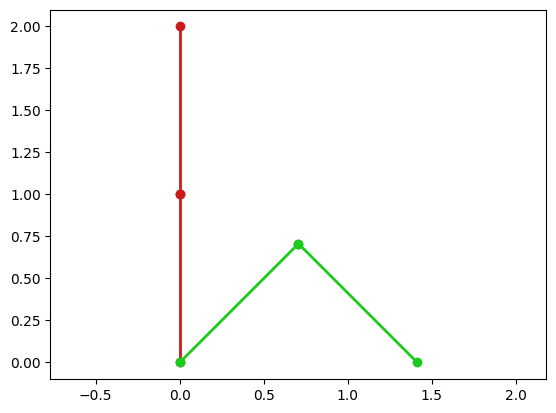

In [48]:
angles_one = np.array([np.pi/2,0]) # [angle1,angle2] in radians
angles_two = np.array([np.pi/4,-np.pi/2]) # [angle1,angle2] in radians
joints_one = move_2R(angles_one)
joints_two = move_2R(angles_two)
color_one = [0.8,0.1,0.1]
color_two = [0.1,0.8,0.1]
render_2R(joints_one, color = color_one)
render_2R(joints_two, color = color_two)
distance = np.sum(np.linalg.norm(joints_one - joints_two, axis=1))
print("distance between two manipulator is ", distance)